In [9]:
from unet.basic_unet_denose import BasicUNetDe
from unet.basic_unet import BasicUNetEncoder

In [10]:
number_modality = 4
number_targets = 3 

In [11]:
embed_model = BasicUNetEncoder(3, number_modality, number_targets, [64, 64, 128, 256, 512, 64])

BasicUNet features: (64, 64, 128, 256, 512, 64).


In [12]:
embed_model

BasicUNetEncoder(
  (conv_0): TwoConv(
    (conv_0): Convolution(
      (conv): Conv3d(4, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (adn): ADN(
        (N): InstanceNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (D): Dropout(p=0.0, inplace=False)
        (A): LeakyReLU(negative_slope=0.1, inplace=True)
      )
    )
    (conv_1): Convolution(
      (conv): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (adn): ADN(
        (N): InstanceNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (D): Dropout(p=0.0, inplace=False)
        (A): LeakyReLU(negative_slope=0.1, inplace=True)
      )
    )
  )
  (down_1): Down(
    (max_pooling): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (convs): TwoConv(
      (conv_0): Convolution(
        (conv): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        (adn):

In [13]:
model = BasicUNetDe(3, number_modality + number_targets, number_targets, [64, 64, 128, 256, 512, 64], 
                                act = ("LeakyReLU", {"negative_slope": 0.1, "inplace": False}))

BasicUNet features: (64, 64, 128, 256, 512, 64).


In [14]:
model

BasicUNetDe(
  (temb): Module(
    (dense): ModuleList(
      (0): Linear(in_features=128, out_features=512, bias=True)
      (1): Linear(in_features=512, out_features=512, bias=True)
    )
  )
  (conv_0): TwoConv(
    (temb_proj): Linear(in_features=512, out_features=64, bias=True)
    (conv_0): Convolution(
      (conv): Conv3d(7, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (adn): ADN(
        (N): InstanceNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (D): Dropout(p=0.0, inplace=False)
        (A): LeakyReLU(negative_slope=0.1)
      )
    )
    (conv_1): Convolution(
      (conv): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (adn): ADN(
        (N): InstanceNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (D): Dropout(p=0.0, inplace=False)
        (A): LeakyReLU(negative_slope=0.1)
      )
    )
  )
  (down_1): Down(
    (max_pooling): MaxPool3d(kern

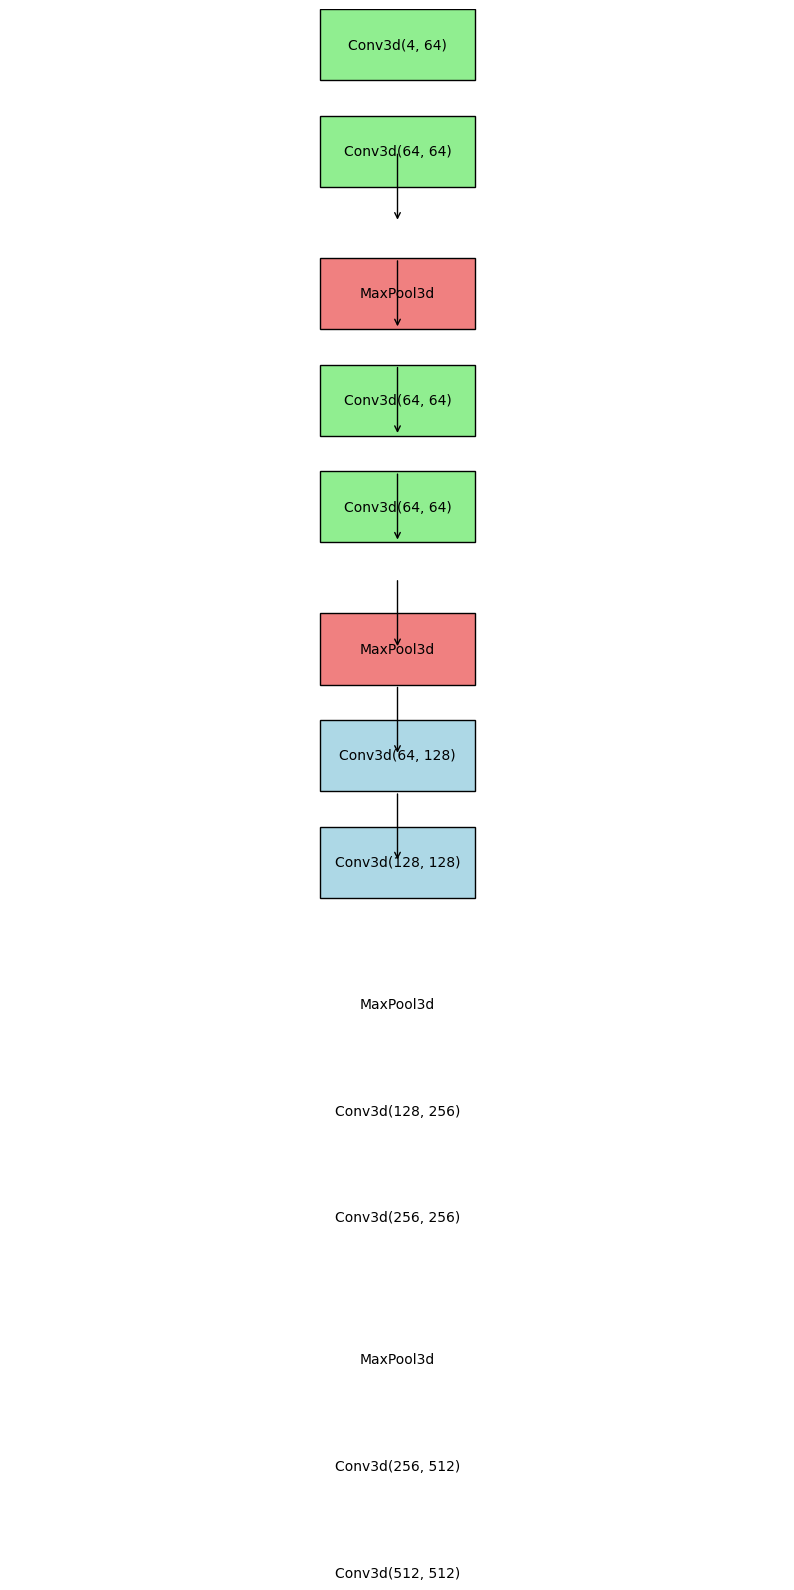

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines

def draw_block(ax, x, y, width, height, label, color='skyblue', edgecolor='black'):
    rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor=edgecolor, facecolor=color)
    ax.add_patch(rect)
    ax.text(x + width / 2, y + height / 2, label, horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')

fig, ax = plt.subplots(figsize=(10, 12))
ax.set_xlim(0, 100)
ax.set_ylim(0, 130)
ax.axis('off')

# Define initial position and block dimensions
y = 120
block_height = 10
block_width = 20
x = 40

# conv_0
draw_block(ax, x, y, block_width, block_height, 'Conv3d(4, 64)', color='lightgreen')
y -= 15
draw_block(ax, x, y, block_width, block_height, 'Conv3d(64, 64)', color='lightgreen')
y -= 20

# down_1
draw_block(ax, x, y, block_width, block_height, 'MaxPool3d', color='lightcoral')
y -= 15
draw_block(ax, x, y, block_width, block_height, 'Conv3d(64, 64)', color='lightgreen')
y -= 15
draw_block(ax, x, y, block_width, block_height, 'Conv3d(64, 64)', color='lightgreen')
y -= 20

# down_2
draw_block(ax, x, y, block_width, block_height, 'MaxPool3d', color='lightcoral')
y -= 15
draw_block(ax, x, y, block_width, block_height, 'Conv3d(64, 128)', color='lightblue')
y -= 15
draw_block(ax, x, y, block_width, block_height, 'Conv3d(128, 128)', color='lightblue')
y -= 20

# down_3
draw_block(ax, x, y, block_width, block_height, 'MaxPool3d', color='lightcoral')
y -= 15
draw_block(ax, x, y, block_width, block_height, 'Conv3d(128, 256)', color='lightyellow')
y -= 15
draw_block(ax, x, y, block_width, block_height, 'Conv3d(256, 256)', color='lightyellow')
y -= 20

# down_4
draw_block(ax, x, y, block_width, block_height, 'MaxPool3d', color='lightcoral')
y -= 15
draw_block(ax, x, y, block_width, block_height, 'Conv3d(256, 512)', color='lightpink')
y -= 15
draw_block(ax, x, y, block_width, block_height, 'Conv3d(512, 512)', color='lightpink')

# Add arrows to visualize the path of input
arrow_props = dict(facecolor='black', shrink=0.05)
arrow_y_positions = [120 - i * 15 for i in range(1, 10)] + [y + 15 * i for i in range(1, 6)]

for arrow_y in arrow_y_positions:
    ax.annotate('', xy=(x + block_width / 2, arrow_y - 5), xytext=(x + block_width / 2, arrow_y + 5),
                arrowprops=dict(arrowstyle='->', color='black'))

plt.show()